In [74]:
import numpy as np
from glob import glob
import os.path as osp
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageDraw
import pandas as pd
from vec3 import vec3

sns.set_palette('husl', 8)
colors = sns.color_palette()
plt.rcParams["figure.figsize"] = (15,7)

In [2]:
dataset_path = '/Users/zal/Data/CARLA-VP/version_1'
images_path = osp.join(dataset_path, 'images')
params_path = osp.join(dataset_path, 'params')

In [6]:
image_path_list = sorted(list(glob(osp.join(images_path, '*.png'))))
params_path_list = sorted(list(glob(osp.join(params_path, '*.npz'))))
len(image_path_list) == len(params_path_list)
name_list = [osp.splitext(osp.basename(image_path))[0] for image_path in image_path_list]

In [9]:
all_widths = []
all_heights = []
for params_path in params_path_list:
    data = np.load(params_path)
    vp1, vp2, vp3 = data['vps']
    all_widths.append(data['image_width'])
    all_heights.append(data['image_height'])

Min widths:     432
Max widths:     768
Mean width:     625.1351931330472


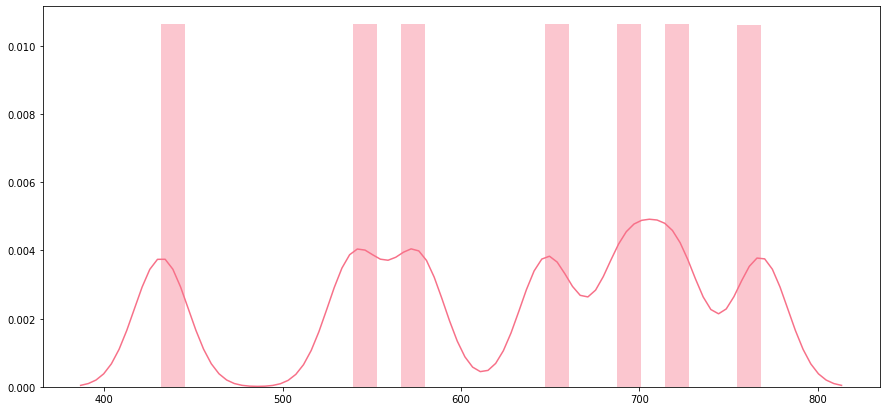

In [75]:
sns.distplot(all_widths, label='Image Width Distribution')
print(f"Min widths:     {np.min(all_widths)}")
print(f"Max widths:     {np.max(all_widths)}")
print(f"Mean width:     {np.mean(all_widths)}")

[array(432, dtype=int32), array(432, dtype=int32), array(432, dtype=int32), array(432, dtype=int32), array(432, dtype=int32), array(432, dtype=int32), array(432, dtype=int32), array(432, dtype=int32), array(432, dtype=int32), array(432, dtype=int32)]


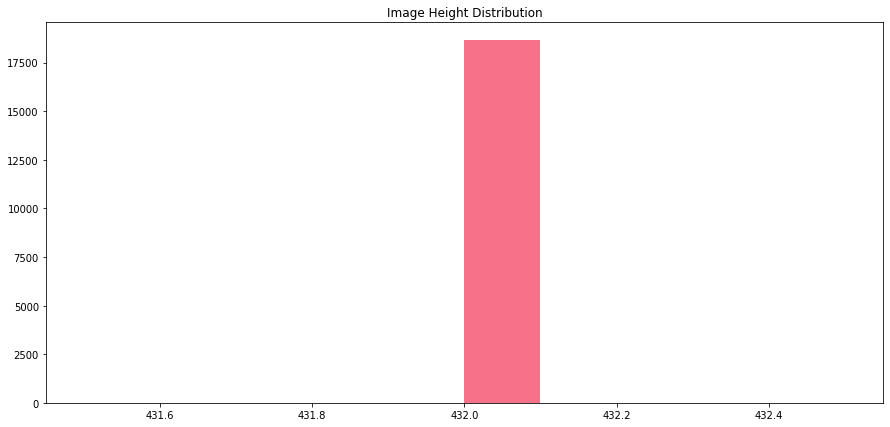

In [78]:
plt.title('Image Height Distribution')
plt.hist(all_heights)
print(all_heights[:10])

All image **heights** are normalized at **432 pixels**.

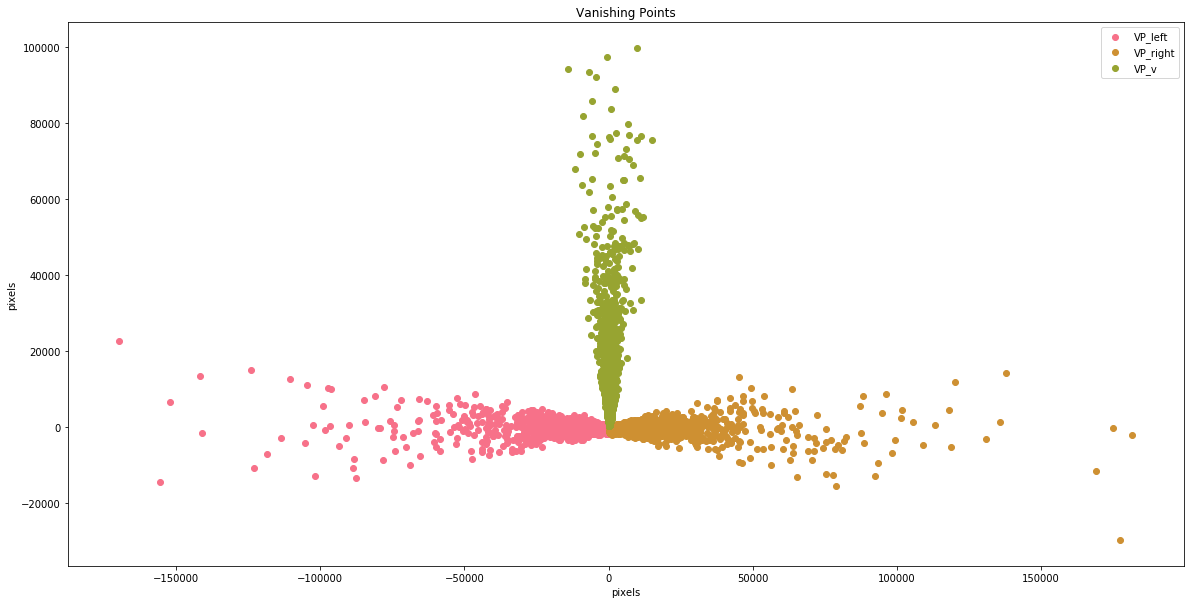

In [69]:
all_vp1 = []
all_vp2 = []
all_vp3 = []
for params_path in params_path_list:
    data = np.load(params_path)
    vp1, vp2, vp3 = data['vps']
    if vp3[1] < 100000:
        if vp1[0] < vp2[0]:
            all_vp1.append(vp1)
            all_vp2.append(vp2)
        else:
            all_vp1.append(vp2)
            all_vp2.append(vp1)
        all_vp3.append(vp3)
        
plt.title('Vanishing Points')
x, y = zip(*all_vp1)
plt.scatter(x, y, marker='o', color=colors[0], label='VP_left')
x, y = zip(*all_vp2)
plt.scatter(x, y, marker='o', color=colors[1], label='VP_right')
x, y = zip(*all_vp3)
plt.scatter(x, y, marker='o', color=colors[2], label='VP_v')
plt.xlabel('pixels')
plt.ylabel('pixels')
plt.legend()

In [43]:
def project_to_stereomap(p, r, w, h):
    sphere_center = vec3([w//2, h//2, r])
    v = p - sphere_center
    s = r * (v/abs(v))
    return np.array(s[:2])

vec3(279.9923741485247, 102.25740555144067, 0.0)

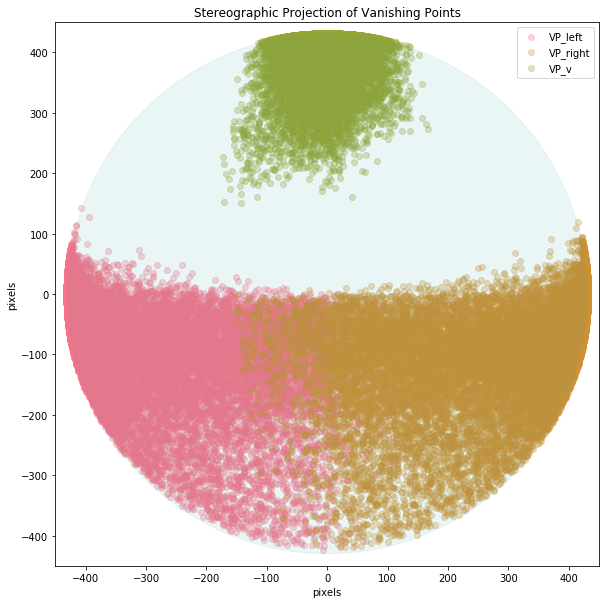

In [68]:
all_projected_vp1 = []
all_projected_vp2 = []
all_projected_vp3 = []
for idx in range(len(all_vp1)):
    all_projected_vp1.append(project_to_stereomap(vec3(all_vp1[idx][0], all_vp1[idx][1], 0), 432, all_widths[idx], all_heights[idx]))
    all_projected_vp2.append(project_to_stereomap(vec3(all_vp2[idx][0], all_vp2[idx][1], 0), 432, all_widths[idx], all_heights[idx]))
    all_projected_vp3.append(project_to_stereomap(vec3(all_vp3[idx][0], all_vp3[idx][1], 0), 432, all_widths[idx], all_heights[idx]))

fig, ax = plt.subplots()
ax.add_artist(plt.Circle((0, 0), 430, color=colors[4], alpha=0.1))
ax.set_aspect('equal')
plt.title('Stereographic Projection of Vanishing Points')
x, y = zip(*all_projected_vp1)
plt.scatter(x, y, marker='o', color=colors[0], label='VP_left', alpha=0.3)
x, y = zip(*all_projected_vp2)
plt.scatter(x, y, marker='o', color=colors[1], label='VP_right', alpha=0.3)
x, y = zip(*all_projected_vp3)
plt.scatter(x, y, marker='o', color=colors[2], label='VP_v', alpha=0.3)
plt.xlabel('pixels')
plt.ylabel('pixels')



plt.xlim(-450, 450)
plt.ylim(-450, 450)
plt.legend()